# Examine books having multiple conferences

In [1]:
import pandas as pd
import pickle
import os
import matplotlib.pyplot as plt
import matplotlib

In [2]:
path_raw = os.path.join("..","data","raw")
filename = os.path.join(path_raw,"springernature-scigraph-books.cc-by.2017-11-07.nt")
file_cache = os.path.join("..","data","interim","exploration","books_multiple_conferences.pkl")
#nt_has_conference = "<http://scigraph.springernature.com/ontologies/core/hasConference>"
nt_conference = "<http://scigraph.springernature.com/ontologies/core/hasConference>"
nt_book = "<http://scigraph.springernature.com/things/books/"

count = 0
filesize = 0
checkpoint = 0

pd.set_option('display.max_colwidth', -1)

In [4]:
try:
    with open(file_cache,"rb") as f:
        multiple_conferences = pickle.load(f)
except FileNotFoundError:
    def count_lines(filename):
        print("Start counting lines.")
        global filesize
        global count
        global checkpoint
        
        c = 0
        with open(filename) as f:
            for line in f:
                c += 1
        
        filesize = c
        count = 0
        checkpoint = int(filesize/100)
    
        print("Finished counting lines: {}".format(filesize))
        
    def increaseCount():
        global count
        global checkpoint
        
        count += 1
        if (count % checkpoint == 0):
            print("Checkpoint reached: {}%".format(int(count*100/filesize)))
    
    multiple_conferences = {}
    
    count_lines(filename)
    with open(filename) as f:
        for line in f:
            increaseCount()
            line = line.split(" ",2)
            if (line[1] == nt_conference):
                if line[0].startswith(nt_book):
                    try:
                        multiple_conferences[line[0]].append(line[2])
                    except KeyError:
                        multiple_conferences[line[0]] = [line[2]]
                        
    with open(file_cache,"wb") as f:
        pickle.dump(multiple_conferences, f)

In [10]:
df = pd.DataFrame(
    list(
            multiple_conferences.items()
    ),
    columns=["book","conference_id"]
)

df = df.set_index(["book"])["conference_id"].apply(pd.Series).stack().reset_index()
df.columns = ["book","num","conference_id"]

hist = df.groupby(["book"]).size().reset_index()
hist.columns = ["book","size"]
hist = hist.sort_values(by="size",ascending=False)

multis = df.loc[df["book"].isin(hist[hist["size"]>1]["book"])]

multis = multis.merge(hist,how="left",on=["book","book"]).sort_values(by=["size","book"],ascending=False)

In [11]:
multis

,book,num,conference_id,size
129,<http://scigraph.springernature.com/things/books/6ce484dbad683330a4d5fc7bf148d792>,0,<http://scigraph.springernature.com/things/conferences/0e73faff1e5bb8cd45b3f957bf0b7c08> .\n,4
130,<http://scigraph.springernature.com/things/books/6ce484dbad683330a4d5fc7bf148d792>,1,<http://scigraph.springernature.com/things/conferences/62ab3090a2806d0e3236e5a1ba0a224d> .\n,4
131,<http://scigraph.springernature.com/things/books/6ce484dbad683330a4d5fc7bf148d792>,2,<http://scigraph.springernature.com/things/conferences/6490af6ed002cf067c1977af06f9296a> .\n,4
132,<http://scigraph.springernature.com/things/books/6ce484dbad683330a4d5fc7bf148d792>,3,<http://scigraph.springernature.com/things/conferences/c7bba923bf39e474ecaeef2089184000> .\n,4
81,<http://scigraph.springernature.com/things/books/e1c60294b777982e995244fb0f3ec40b>,0,<http://scigraph.springernature.com/things/conferences/990c4172de7534f36a3483e003582503> .\n,3
82,<http://scigraph.springernature.com/things/books/e1c60294b777982e995244fb0f3ec40b>,1,<http://scigraph.springernature.com/things/conferences/4351290a97663cc41b6fd8e76406aca9> .\n,3
83,<http://scigraph.springernature.com/things/books/e1c60294b777982e995244fb0f3ec40b>,2,<http://scigraph.springernature.com/things/conferences/fa24e12be2c3316a638af9f727607697> .\n,3
69,<http://scigraph.springernature.com/things/books/e09f9f775d0773dec620b01e5cceb5dc>,0,<http://scigraph.springernature.com/things/conferences/b14421a5bb9fe99942ec1e8ca76fc3f3> .\n,3
70,<http://scigraph.springernature.com/things/books/e09f9f775d0773dec620b01e5cceb5dc>,1,<http://scigraph.springernature.com/things/conferences/926662287c6ef636ce61a8e92b2da915> .\n,3
71,<http://scigraph.springernature.com/things/books/e09f9f775d0773dec620b01e5cceb5dc>,2,<http://scigraph.springernature.com/things/conferences/93bbb8197c7bb547e88d8f13a2ef7046> .\n,3


book    9207
dtype: int64
      book
size      
1     9146
2     51  
3     9   
4     1   


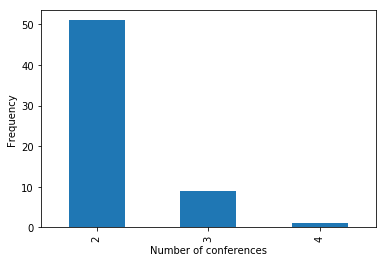

In [9]:
print(hist.groupby(by="size").count().sum())

print(
    hist.groupby(by="size").count()
)

hist[hist["size"]>1].groupby(by="size").count().plot(
    kind="bar"
)
plt.xlabel("Number of conferences")
plt.ylabel("Frequency")
plt.legend().remove()
plt.show()